In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Input
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import numpy as np
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt

In [5]:
"""
Load data and setup train/test split
~91k train reviews, ~39k test
"""
reviews = pd.read_csv("classifier_data.csv")
reviews.dropna(inplace=True)
train, test = train_test_split(reviews, test_size=0.30, random_state=12)
train_x = train['Review']
train_y = train['Real']
test_x = test['Review']
test_y = test['Real']

In [81]:
train_x.values

array(['Charged me ridiculous charge too much for the same thing worth consider have cheap get something small in town',
       'Wow So delicious the perfect omelette and the wafer Great service too Definitely come back here for brunch',
       'Really like the place and the food be great The service be a bite slow but we will be go back',
       ...,
       'Why be you close today have Tuesday and have I be look forward to try this place',
       'Definitely one of the well all you can eat sushi bar in Vegas serve Will be impeccable atmosphere be amaze definitely return back',
       'So glad to have a PHO place in NLV it be bomb I would really recommend for you guy to come and try it out'],
      dtype=object)

In [ ]:
"""
SourceS:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
https://towardsdatascience.com/tensorflow-2-0-data-transformation-for-text-classification-b86ee2ad8877
https://www.tensorflow.org/tutorials/text/text_classification_rnn
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/text/text_classification_rnn.ipynb#scrollTo=tBoyjjWg0Ac9
"""

In [89]:
VOCAB_SIZE=10000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(list(train_x.values))

In [9]:
avg_len = 0
counter = 0
max = 0
for i in x_train_tokens:
  avg_len += len(i)
  counter += 1
  if len(i) > max:
    max = len(i)
print(max)
print(avg_len/counter)

150
18.4834198258422


In [90]:
len(encoder.get_vocabulary())

10000

In [132]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential()
model.add(encoder)
model.add(Embedding(VOCAB_SIZE, 128, mask_zero=True))
model.add(Bidirectional(LSTM(64, activation='tanh', dropout=0.15, return_sequences=True)))
model.add(Bidirectional(LSTM(32, activation='tanh', dropout=0.15)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True) #from logits as we get probability output
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [133]:
history = model.fit(train_x.values,
                    train_y.values,
                    epochs = 10,
                    validation_split=0.15,
                    batch_size=64,
                    callbacks=[callback]
                    )

Epoch 1/10
1208/1208 [==============================] - 62s 38ms/step - loss: 0.6760 - accuracy: 0.5705 - val_loss: 0.6645 - val_accuracy: 0.5996
Epoch 2/10
1208/1208 [==============================] - 42s 35ms/step - loss: 0.6392 - accuracy: 0.6706 - val_loss: 0.6663 - val_accuracy: 0.6559
Epoch 3/10
1208/1208 [==============================] - 43s 35ms/step - loss: 0.6145 - accuracy: 0.7002 - val_loss: 0.6743 - val_accuracy: 0.6374
Epoch 4/10
1208/1208 [==============================] - 42s 35ms/step - loss: 0.5908 - accuracy: 0.7270 - val_loss: 0.6944 - val_accuracy: 0.6254
Epoch 5/10
1208/1208 [==============================] - 42s 35ms/step - loss: 0.5655 - accuracy: 0.7494 - val_loss: 0.7275 - val_accuracy: 0.6282
Epoch 6/10
1208/1208 [==============================] - 43s 35ms/step - loss: 0.5504 - accuracy: 0.7628 - val_loss: 0.7197 - val_accuracy: 0.6227


(0.0, 0.7361176997423172)

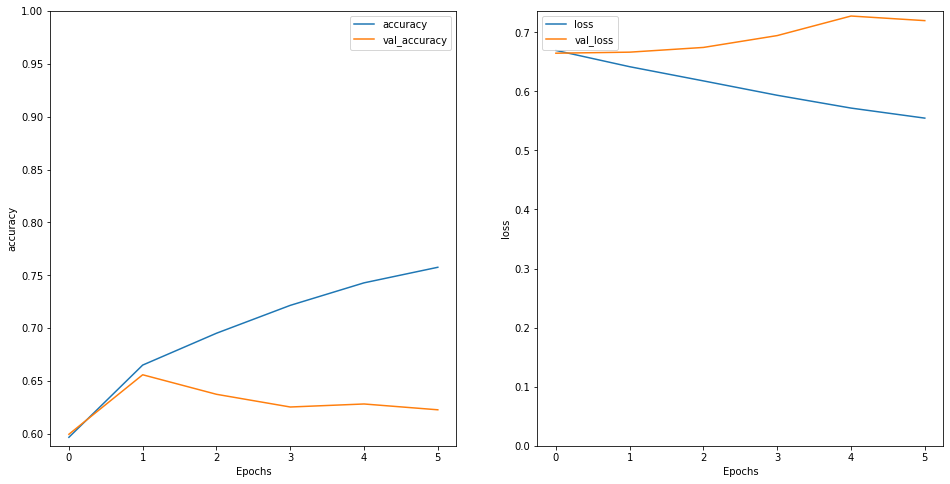

In [134]:
#Source: https://www.tensorflow.org/tutorials/text/text_classification_rnn
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

In [135]:
tf.keras.models.save_model(
    model, "lstm"
    )

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


In [136]:
loaded_model = tf.keras.models.load_model('lstm')

In [139]:
sample_text = ('good pizza')
predictions = model.predict(np.array([sample_text]))

In [140]:
predictions

array([[0.]], dtype=float32)

In [146]:
from google.colab import files
!zip -r /content/file.zip /content/lstm
files.download('/content/file.zip') 

updating: content/lstm/ (stored 0%)
updating: content/lstm/variables/ (stored 0%)
updating: content/lstm/variables/variables.index (deflated 68%)
updating: content/lstm/variables/variables.data-00000-of-00001 (deflated 14%)
updating: content/lstm/assets/ (stored 0%)
updating: content/lstm/saved_model.pb (deflated 90%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>